In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [40]:
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [41]:
df = pd.read_csv("SouthGermanCredit.asc", delimiter=" ")
df.columns.values[:] = ["status", "duration", "credit_history", "purpose", "amount", 
                "savings", "employment_duration", "installment_rate",
                "personal_status_sex", "other_debtors",
                "present_residence", "property",
                "age", "other_installment_plans",
                "housing", "number_credits",
                "job", "people_liable", "telephone", "foreign_worker",
                "credit_risk"]
df
X, y = df.drop(columns='credit_risk'), df['credit_risk']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

In [42]:
df.corr()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
status,1.000000,-0.072013,0.192191,0.028783,-0.042695,0.222867,0.106339,-0.005280,0.043261,-0.127737,...,-0.032260,0.058631,0.068274,0.023335,0.076005,0.040663,0.014145,0.066296,0.035187,0.350847
duration,-0.072013,1.000000,-0.077186,0.147492,0.624988,0.047661,0.057381,0.074749,0.014789,-0.024490,...,0.303971,-0.037550,-0.062884,0.153126,-0.011284,0.210910,0.023834,0.164718,0.134680,-0.214927
credit_history,0.192191,-0.077186,1.000000,-0.090336,-0.059915,0.039058,0.138225,0.044375,0.042171,-0.040676,...,-0.053777,0.146337,0.159957,0.061428,0.437066,0.010350,-0.011550,0.052370,-0.028554,0.228785
purpose,0.028783,0.147492,-0.090336,1.000000,0.068480,-0.018684,0.016013,0.048369,0.000157,-0.017607,...,0.010966,-0.000892,-0.100230,0.013495,0.054935,0.008085,0.032577,0.078371,0.113244,-0.017979
amount,-0.042695,0.624988,-0.059915,0.068480,1.000000,0.064632,-0.008376,-0.271322,-0.016094,-0.027831,...,0.311602,0.032273,-0.069392,0.133024,0.020785,0.285393,-0.017144,0.277000,0.030662,-0.154740
savings,0.222867,0.047661,0.039058,-0.018684,0.064632,1.000000,0.120950,0.021993,0.017349,-0.105069,...,0.018948,0.083434,0.001908,0.006644,-0.021644,0.011709,-0.027514,0.087208,-0.010450,0.178943
employment_duration,0.106339,0.057381,0.138225,0.016013,-0.008376,0.120950,1.000000,0.126161,0.111278,-0.008116,...,0.087187,0.259116,-0.007279,0.115077,0.125791,0.101225,-0.097192,0.060518,0.022845,0.116002
installment_rate,-0.005280,0.074749,0.044375,0.048369,-0.271322,0.021993,0.126161,1.000000,0.119308,-0.011398,...,0.053391,0.057271,0.007894,0.091229,0.021669,0.097755,0.071207,0.014413,0.094762,-0.072404
personal_status_sex,0.043261,0.014789,0.042171,0.000157,-0.016094,0.017349,0.111278,0.119308,1.000000,0.050634,...,-0.006940,0.005150,-0.026747,0.098934,0.064672,-0.011956,-0.122165,0.027275,-0.073103,0.088184
other_debtors,-0.127737,-0.024490,-0.040676,-0.017607,-0.027831,-0.105069,-0.008116,-0.011398,0.050634,1.000000,...,-0.155450,-0.029826,-0.038235,-0.065449,-0.025447,-0.057963,-0.020400,-0.075035,-0.140190,0.025137


In [43]:
glm_train = LogisticRegression().fit(X_train, y_train)
prob = glm_train.predict_proba(X_test)
pred = prob[:,1]
prob_t = glm_train.predict_proba(X_train)
pred_t = prob_t[:,1]

/Users/giu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
logit1 = sm.Logit(y.astype(float),sm.add_constant(X.astype(float))).fit()
print(logit1.summary())

Optimization terminated successfully.
         Current function value: 0.478279
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            credit_risk   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      979
Method:                           MLE   Df Model:                           20
Date:                Mon, 16 Oct 2023   Pseudo R-squ.:                  0.2170
Time:                        17:26:00   Log-Likelihood:                -478.28
converged:                       True   LL-Null:                       -610.86
Covariance Type:            nonrobust   LLR p-value:                 9.812e-45
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.0314      1.461     -0.706      0.480      -3.895   

The predictors that are the most relevant the one related to the history of the person. So as the history of the user gets better the credit as well .

In [45]:
X_red, y_red = df[['status','duration','credit_history','savings','installment_rate','other_installment_plans']], df['credit_risk']
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red,y_red, test_size=0.33)
glm_train = LogisticRegression().fit(X_red_train, y_red_train)

prob_red = glm_train.predict_proba(X_red_test)
pred_rd = prob_red[:,1]

prob_t_red = glm_train.predict_proba(X_red_train)
pred_t_rd = prob_t_red[:,1]

In [46]:
fpr, tpr, threshold = metrics.roc_curve(np.asarray(y_test), pred)
roc_auc = metrics.auc(fpr, tpr)

fpr_red, tpr_red, threshold = metrics.roc_curve(y_red_test, pred_rd)
roc_auc_red = metrics.auc(fpr_red, tpr_red)

print("Full model AUC:", roc_auc)
print("Reduced model AUC:", roc_auc_red)

Full model AUC: 0.7523611111111111
Reduced model AUC: 0.74625502374863


In [47]:
fpr_t, tpr_t, threshold = metrics.roc_curve(y_train, pred_t)
roc_auc_t = metrics.auc(fpr_t, tpr_t)

fpr_red_t, tpr_red_t, threshold = metrics.roc_curve(y_red_train, pred_t_rd)
roc_auc_red_t = metrics.auc(fpr_red_t, tpr_red_t)

print("Full model AUC:", roc_auc_t)
print("Reduced model AUC:", roc_auc_red_t)

Full model AUC: 0.7994409937888198
Reduced model AUC: 0.7930819180819181


/var/folders/2j/cgxlgwmd4pg23dn49wtq0lzw0000gn/T/ipykernel_37300/3332237929.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr_t, tpr_t, 'b', label = 'AUC = %0.2f' % roc_auc_t, color = 'green')


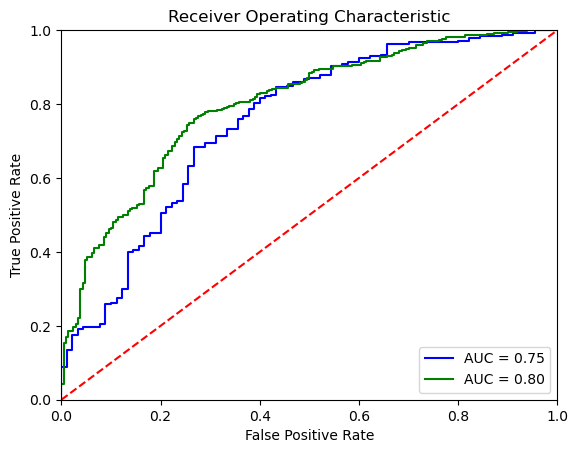

In [48]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_t, tpr_t, 'b', label = 'AUC = %0.2f' % roc_auc_t, color = 'green')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

/var/folders/2j/cgxlgwmd4pg23dn49wtq0lzw0000gn/T/ipykernel_37300/3075701068.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr_red, tpr_red, 'b', label = 'AUC = %0.2f' % roc_auc_red, color = 'purple')
/var/folders/2j/cgxlgwmd4pg23dn49wtq0lzw0000gn/T/ipykernel_37300/3075701068.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr_red_t, tpr_red_t, 'b', label = 'AUC = %0.2f' % roc_auc_red_t, color = 'brown')


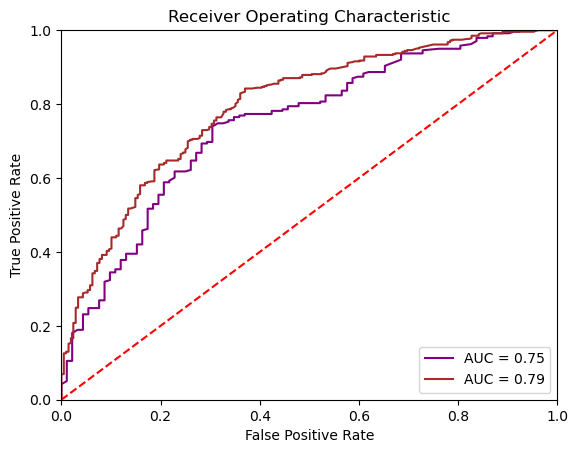

In [49]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_red, tpr_red, 'b', label = 'AUC = %0.2f' % roc_auc_red, color = 'purple')
plt.plot(fpr_red_t, tpr_red_t, 'b', label = 'AUC = %0.2f' % roc_auc_red_t, color = 'brown')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The overfitting on the full model is more apparent than the reduced model, being possible to say that the reduced model is a better model that can explain better with less predictors.

In [50]:
lda = LDA()
lda_train = lda.fit(X_train, y_train)
prob_lda = lda_train.predict_proba(X_test)
pred_lda = prob_lda[:,1]
fpr_lda, tpr_lda, threshold = metrics.roc_curve(np.asarray(y_test), pred_lda)
roc_auc_lda = metrics.auc(fpr_lda, tpr_lda)
print(classification_report(y_test,lda.predict(X_test)))

              precision    recall  f1-score   support

           0       0.59      0.49      0.53        90
           1       0.82      0.87      0.84       240

    accuracy                           0.77       330
   macro avg       0.70      0.68      0.69       330
weighted avg       0.76      0.77      0.76       330



/var/folders/2j/cgxlgwmd4pg23dn49wtq0lzw0000gn/T/ipykernel_37300/1957844629.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr_lda, tpr_lda, 'b', label = 'AUC = %0.2f' % roc_auc_lda, color = 'purple')


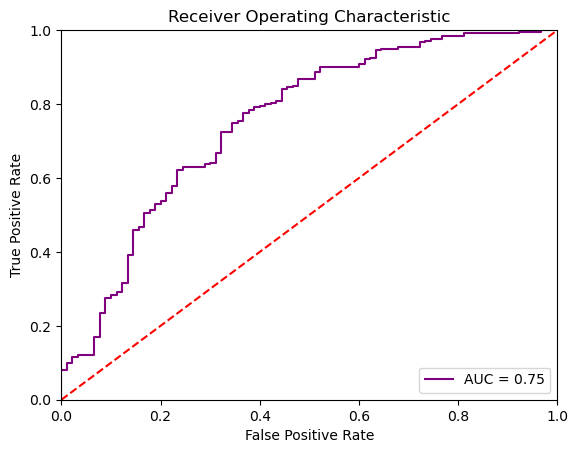

In [51]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lda, tpr_lda, 'b', label = 'AUC = %0.2f' % roc_auc_lda, color = 'purple')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [52]:
qda = QDA()
qda_train = qda.fit(X_train, y_train)
prob_qda = qda_train.predict_proba(X_test)
pred_qda = prob_qda[:,1]
fpr_qda, tpr_qda, threshold = metrics.roc_curve(np.asarray(y_test), pred_qda)
roc_auc_qda = metrics.auc(fpr_qda, tpr_qda)
print(classification_report(y_test,qda.predict(X_test)))

              precision    recall  f1-score   support

           0       0.47      0.63      0.54        90
           1       0.84      0.73      0.78       240

    accuracy                           0.70       330
   macro avg       0.65      0.68      0.66       330
weighted avg       0.74      0.70      0.71       330



/var/folders/2j/cgxlgwmd4pg23dn49wtq0lzw0000gn/T/ipykernel_37300/2232806527.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr_qda, tpr_qda, 'b', label = 'AUC = %0.2f' % roc_auc_qda, color = 'purple')


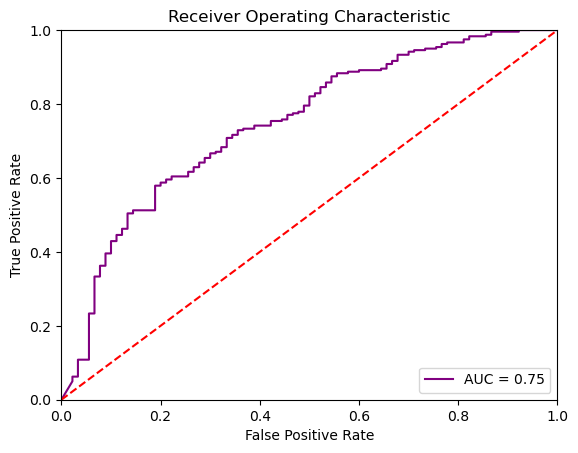

In [53]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_qda, tpr_qda, 'b', label = 'AUC = %0.2f' % roc_auc_qda, color = 'purple')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

/var/folders/2j/cgxlgwmd4pg23dn49wtq0lzw0000gn/T/ipykernel_37300/2023493763.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr_lda, tpr_lda, 'b', label = 'AUC = %0.2f' % roc_auc_qda, color = 'purple')
/var/folders/2j/cgxlgwmd4pg23dn49wtq0lzw0000gn/T/ipykernel_37300/2023493763.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr_qda, tpr_qda, 'b', label = 'AUC = %0.2f' % roc_auc_lda, color = 'green')
/var/folders/2j/cgxlgwmd4pg23dn49wtq0lzw0000gn/T/ipykernel_37300/2023493763.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc, color

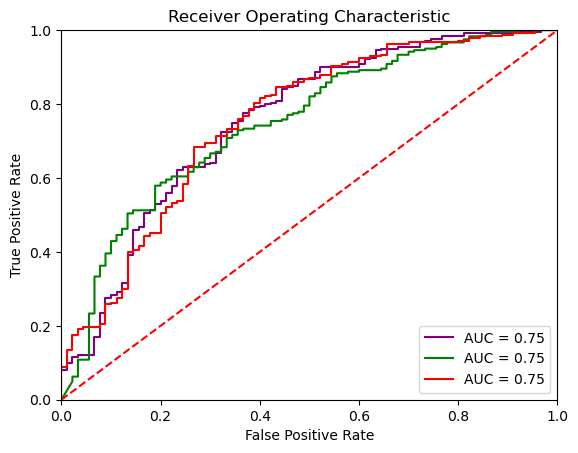

In [54]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lda, tpr_lda, 'b', label = 'AUC = %0.2f' % roc_auc_qda, color = 'purple')
plt.plot(fpr_qda, tpr_qda, 'b', label = 'AUC = %0.2f' % roc_auc_lda, color = 'green')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc, color = 'red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

After several runs on the model, all three different models reach similar scores, with the QDA(purple) being the most consistent and even with a better shape, is possible to assume that is more accurate for this problem.

### Question 4

\begin{align*}
        \delta_k(x) &= x \frac{\mu_k}{\sigma^2} - \frac{\mu^2_k}{\sigma^2} + \log(\pi_k) \\
        \delta_1 &= \delta_2\\
        \log(\pi_1) &= \log(\pi_2)\\
        x \frac{\mu_1}{\sigma^2} - \frac{\mu^2_1}{2\sigma^2} &= x \frac{\mu_2}{\sigma^2} - \frac{\mu^2_2}{2\sigma^2}\\
        \frac{x}{\sigma^2} \left(\mu_1 - \mu_2\right) &= \frac{1}{2\sigma^2}\left( \mu^2_1 - \mu_2^2\right)\\
        2x &= \frac{\left( \mu^2_1 - \mu_2^2\right)}{\left(\mu_1 - \mu_2\right)}\\
        2x &= \frac{(\mu_1 + \mu_2)(\mu_1 - \mu_2)}{(\mu_1 - \mu_2)}\\
        2x &= (\mu_1 + \mu_2)\\ 
        x &= \frac{\mu_1 + \mu_2}{2}
    \end{align*}